works

C:\Users\asens\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\asens\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


No checkpoint found. Starting from scratch.
Epoch 1/20


Training:   3%|▎         | 32/1000 [00:36<18:38,  1.16s/it]


KeyboardInterrupt: 

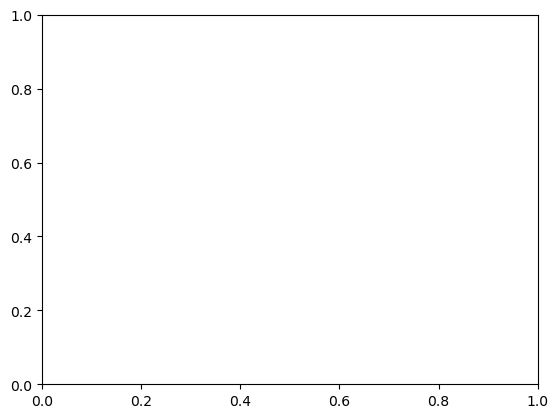

In [3]:
# import os
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import transforms, models
# from torch.utils.data import Dataset, DataLoader
# from sklearn.model_selection import train_test_split
# from tqdm import tqdm
# from PIL import Image
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import json
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # --- Custom Dataset ---
# class ImageDataset(Dataset):
#     def __init__(self, csv_file, img_dir, transform=None):
#         self.annotations = csv_file
#         self.img_dir = img_dir
#         self.transform = transform

#     def __len__(self):
#         return len(self.annotations)

#     def __getitem__(self, idx):
#         img_path = os.path.join(self.img_dir, self.annotations.iloc[idx, 0])
#         image = Image.open(img_path).convert("RGB")
#         label = torch.tensor(int(self.annotations.iloc[idx, 1]))

#         if self.transform:
#             image = self.transform(image)

#         return image, label

# # --- Early Stopping ---
# class EarlyStopping:
#     def __init__(self, patience=5, verbose=True):
#         self.patience = patience
#         self.verbose = verbose
#         self.counter = 0
#         self.best_loss = None
#         self.early_stop = False

#     def __call__(self, val_loss, model, optimizer, scheduler, epoch, path="checkpoint.pth"):
#         if self.best_loss is None or val_loss < self.best_loss:
#             self.best_loss = val_loss
#             self.counter = 0
#             torch.save({
#                 "epoch": epoch,
#                 "model_state_dict": model.state_dict(),
#                 "optimizer_state_dict": optimizer.state_dict(),
#                 "scheduler_state_dict": scheduler.state_dict(),
#                 "best_loss": self.best_loss
#             }, path)
#             if self.verbose:
#                 print(f"Validation loss improved to {val_loss:.4f}. Checkpoint saved!")
#         else:
#             self.counter += 1
#             if self.verbose:
#                 print(f"No improvement. EarlyStopping counter: {self.counter}/{self.patience}")
#             if self.counter >= self.patience:
#                 self.early_stop = True

# # --- Data Preparation ---
# csv_path = "train.csv"
# train_df = pd.read_csv(csv_path)
# train_df["file_name"] = train_df["file_name"].str.replace("train_data/", "", regex=False)
# train_df = train_df.drop(columns=["Unnamed: 0"])

# train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

# train_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(10),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

# val_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

# img_dir = "train_data"
# train_dataset = ImageDataset(train_df, img_dir, transform=train_transform)
# val_dataset = ImageDataset(val_df, img_dir, transform=val_transform)

# batch_size = 64
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
# val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

# # --- Model Setup ---
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = models.resnet50(pretrained=True)
# num_features = model.fc.in_features
# model.fc = nn.Linear(num_features, 1)
# model = model.to(device)

# criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.Adam(model.parameters(), lr=1e-4)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# # --- Resume Training ---
# def load_checkpoint(path, model, optimizer, scheduler):
#     if os.path.exists(path):
#         checkpoint = torch.load(path)
#         model.load_state_dict(checkpoint["model_state_dict"])
#         optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
#         scheduler.load_state_dict(checkpoint["scheduler_state_dict"])
#         start_epoch = checkpoint["epoch"] + 1
#         best_val_loss = checkpoint["best_loss"]
#         print(f"Checkpoint loaded: Resuming from epoch {start_epoch} with best_val_loss {best_val_loss:.4f}")
#         return start_epoch, best_val_loss
#     else:
#         print("No checkpoint found. Starting from scratch.")
#         return 0, float("inf")

# # --- Training and Validation Functions ---
# def train_one_epoch(model, train_loader, criterion, optimizer, device):
#     model.train()
#     running_loss = 0.0

#     for images, labels in tqdm(train_loader, desc="Training"):
#         images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item() * images.size(0)

#     epoch_loss = running_loss / len(train_loader.dataset)
#     return epoch_loss

# def validate(model, val_loader, criterion, device):
#     model.eval()
#     running_loss = 0.0
#     all_labels = []
#     all_outputs = []

#     with torch.no_grad():
#         for images, labels in tqdm(val_loader, desc="Validation"):
#             images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

#             outputs = model(images)
#             loss = criterion(outputs, labels)

#             running_loss += loss.item() * images.size(0)
#             all_labels.append(labels.cpu().numpy())
#             all_outputs.append(outputs.cpu().numpy())

#     epoch_loss = running_loss / len(val_loader.dataset)
#     all_labels = np.concatenate(all_labels)
#     all_outputs = torch.sigmoid(torch.tensor(np.concatenate(all_outputs))).numpy()

#     return epoch_loss, all_labels, all_outputs

# # --- Main Training Script ---
# num_epochs = 20
# checkpoint_path = "checkpoint.pth"
# start_epoch, best_val_loss = load_checkpoint(checkpoint_path, model, optimizer, scheduler)
# early_stopping = EarlyStopping(patience=5, verbose=True)

# train_losses = []
# val_losses = []
# val_accuracies = []

# plt.ion()
# fig, ax = plt.subplots()

# for epoch in range(start_epoch, num_epochs):
#     print(f"Epoch {epoch+1}/{num_epochs}")

#     train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
#     train_losses.append(train_loss)

#     val_loss, val_labels, val_outputs = validate(model, val_loader, criterion, device)
#     val_losses.append(val_loss)

#     val_preds = (val_outputs > 0.5).astype(int)
#     accuracy = (val_preds == val_labels).mean()
#     val_accuracies.append(accuracy)

#     print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {accuracy:.4f}")

#     scheduler.step()

#     early_stopping(val_loss, model, optimizer, scheduler, epoch, path=checkpoint_path)
#     if early_stopping.early_stop:
#         print("Early stopping triggered!")
#         break

#     ax.clear()
#     ax.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss", marker="o")
#     ax.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss", marker="o")
#     ax.set_xlabel("Epochs")
#     ax.set_ylabel("Loss")
#     ax.set_title("Training and Validation Loss")
#     ax.legend()
#     plt.draw()
#     plt.pause(0.01)

# metrics = {
#     "train_loss": train_losses,
#     "val_loss": val_losses,
#     "val_accuracy": val_accuracies
# }

# with open("training_metrics.json", "w") as f:
#     json.dump(metrics, f)
# print("Saved training metrics to 'training_metrics.json'")

# plt.ioff()
# plt.show()

# print("Training Complete.")


GRAD CAM

In [ ]:
# class GradCAM:
#     def __init__(self, model, target_layer):
#         """
#         Initialize Grad-CAM with the model and the target layer.
#         Args:
#         - model: Trained PyTorch model.
#         - target_layer: Layer to compute Grad-CAM for.
#         """
#         self.model = model
#         self.target_layer = target_layer
#         self.gradients = None

#         # Hook to get gradients
#         target_layer.register_backward_hook(self.save_gradients)

#     def save_gradients(self, module, grad_input, grad_output):
#         self.gradients = grad_output[0]

#     def generate_heatmap(self, feature_maps, gradients):
#         """
#         Generate a heatmap using feature maps and gradients.
#         """
#         weights = gradients.mean(dim=(2, 3), keepdim=True)  # Global average pooling
#         cam = (weights * feature_maps).sum(dim=1, keepdim=True)  # Weighted sum
#         cam = torch.relu(cam)  # ReLU to keep only positive values
#         cam = cam.squeeze().cpu().detach().numpy()
#         cam = (cam - cam.min()) / (cam.max() - cam.min())  # Normalize to [0, 1]
#         return cam

#     def __call__(self, input_image, target_class):
#         """
#         Compute Grad-CAM for a given input and target class.
#         Args:
#         - input_image: Preprocessed input tensor of shape [1, C, H, W].
#         - target_class: Class index for which Grad-CAM is computed.
#         """
#         self.model.eval()

#         # Forward pass
#         feature_maps = None
#         for name, module in self.model.named_modules():
#             input_image = module(input_image)
#             if name == self.target_layer:
#                 feature_maps = input_image

#         # Backward pass
#         self.model.zero_grad()
#         output = input_image[:, target_class]
#         output.backward()

#         # Generate heatmap
#         gradients = self.gradients
#         heatmap = self.generate_heatmap(feature_maps, gradients)
#         return heatmap


GRAD CAM

In [ ]:
# from torchvision.transforms.functional import to_pil_image
# import cv2

# def apply_gradcam(model, image_path, target_layer, label_map):
#     """
#     Apply Grad-CAM to a single image.
#     Args:
#     - model: Trained PyTorch model.
#     - image_path: Path to the input image.
#     - target_layer: Target layer for Grad-CAM.
#     - label_map: Dictionary mapping labels to class names.
#     """
#     transform = transforms.Compose([
#         transforms.Resize((224, 224)),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#     ])

#     # Load and preprocess image
#     image = Image.open(image_path).convert("RGB")
#     input_tensor = transform(image).unsqueeze(0).to(device)

#     # Get prediction
#     with torch.no_grad():
#         output = model(input_tensor)
#         pred_class = torch.sigmoid(output).item() > 0.5  # Binary prediction
#         pred_label = label_map[int(pred_class)]

#     # Apply Grad-CAM
#     gradcam = GradCAM(model, target_layer)
#     heatmap = gradcam(input_tensor, int(pred_class))

#     # Visualize heatmap
#     heatmap_resized = cv2.resize(heatmap, (224, 224))
#     heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
#     overlay = cv2.addWeighted(np.array(image), 0.5, heatmap_colored, 0.5, 0)

#     plt.figure(figsize=(10, 5))
#     plt.subplot(1, 2, 1)
#     plt.imshow(image)
#     plt.title(f"Original Image ({pred_label})")
#     plt.axis("off")

#     plt.subplot(1, 2, 2)
#     plt.imshow(overlay)
#     plt.title("Grad-CAM Heatmap")
#     plt.axis("off")

#     plt.tight_layout()
#     plt.show()

# # Example Usage
# label_map = {0: "Real", 1: "Fake"}
# image_path = "path/to/test/image.jpg"
# apply_gradcam(model, image_path, "layer4", label_map)


In [10]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Custom Dataset ---
class ImageDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.annotations = csv_file
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.annotations.iloc[idx, 0])
        image = Image.open(img_path).convert("RGB")
        label = torch.tensor(int(self.annotations.iloc[idx, 1]))

        if self.transform:
            image = self.transform(image)

        return image, label

# --- Early Stopping ---
class EarlyStopping:
    def __init__(self, patience=5, verbose=True):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss, model, optimizer, epoch, path="best_model.pth"):
        if self.best_loss is None or val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
            torch.save({
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "best_loss": self.best_loss
            }, path)
            if self.verbose:
                print(f"Validation loss improved to {val_loss:.4f}. Checkpoint saved!")
        else:
            self.counter += 1
            if self.verbose:
                print(f"No improvement. EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

# --- Data Preparation ---
csv_path = "train.csv"
train_df = pd.read_csv(csv_path)
train_df["file_name"] = train_df["file_name"].str.replace("train_data/", "", regex=False)
train_df = train_df.drop(columns=["Unnamed: 0"])

train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

img_dir = "train_data"
train_dataset = ImageDataset(train_df, img_dir, transform=train_transform)
val_dataset = ImageDataset(val_df, img_dir, transform=val_transform)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

# --- Model Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet50(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 1)
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4) 

# --- Resume Training ---
def load_checkpoint(path, model, optimizer):
    if os.path.exists(path):
        checkpoint = torch.load(path)
        model.load_state_dict(checkpoint["model_state_dict"])
        optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
        start_epoch = checkpoint["epoch"] + 1
        best_val_loss = checkpoint["best_loss"]
        print(f"Resuming from epoch {start_epoch} with best validation loss {best_val_loss:.4f}")
        return start_epoch, best_val_loss
    else:
        print("No checkpoint found. Starting from scratch.")
        return 0, float("inf")

# --- Training and Validation Functions ---
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader, desc="Training"):
        images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    return epoch_loss

def validate(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_labels = []
    all_outputs = []

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            all_labels.append(labels.cpu().numpy())
            all_outputs.append(outputs.cpu().numpy())

    epoch_loss = running_loss / len(val_loader.dataset)
    all_labels = np.concatenate(all_labels)
    all_outputs = torch.sigmoid(torch.tensor(np.concatenate(all_outputs))).numpy()

    # Compute Metrics
    val_preds = (all_outputs > 0.5).astype(int)
    accuracy = accuracy_score(all_labels, val_preds)
    precision = precision_score(all_labels, val_preds)
    recall = recall_score(all_labels, val_preds)
    f1 = f1_score(all_labels, val_preds)
    auc = roc_auc_score(all_labels, all_outputs)

    return epoch_loss, accuracy, precision, recall, f1, auc

# --- Main Training Script ---
num_epochs = 20
checkpoint_path = "best_model.pth"
start_epoch, best_val_loss = load_checkpoint(checkpoint_path, model, optimizer)
early_stopping = EarlyStopping(patience=5, verbose=True)

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(start_epoch, num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")

    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    val_loss, accuracy, precision, recall, f1, auc = validate(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(accuracy)

    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
          f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, "
          f"F1-score: {f1:.4f}, AUC: {auc:.4f}")

    early_stopping(val_loss, model, optimizer, epoch, path=checkpoint_path)
    if early_stopping.early_stop:
        print("Early stopping triggered!")
        break

metrics = {"train_loss": train_losses, "val_loss": val_losses, "val_accuracy": val_accuracies}
with open("training_metrics.json", "w") as f:
    json.dump(metrics, f)
print("Saved training metrics to 'training_metrics.json'")

print("Training Complete.")


C:\Users\asens\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\asens\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


No checkpoint found. Starting from scratch.
Epoch 1/20


Validation: 100%|██████████| 250/250 [03:47<00:00,  1.10it/s]


Train Loss: 0.0749, Val Loss: 0.0395, Accuracy: 0.9856, Precision: 0.9806, Recall: 0.9909, F1-score: 0.9857, AUC: 0.9991
Validation loss improved to 0.0395. Checkpoint saved!
Epoch 2/20


Validation: 100%|██████████| 250/250 [03:53<00:00,  1.07it/s]


Train Loss: 0.0308, Val Loss: 0.0209, Accuracy: 0.9930, Precision: 0.9935, Recall: 0.9925, F1-score: 0.9930, AUC: 0.9997
Validation loss improved to 0.0209. Checkpoint saved!
Epoch 3/20


Validation: 100%|██████████| 250/250 [02:14<00:00,  1.86it/s]


Train Loss: 0.0210, Val Loss: 0.0260, Accuracy: 0.9901, Precision: 0.9855, Recall: 0.9947, F1-score: 0.9901, AUC: 0.9997
No improvement. EarlyStopping counter: 1/5
Epoch 4/20


Validation: 100%|██████████| 250/250 [02:26<00:00,  1.71it/s]


Train Loss: 0.0170, Val Loss: 0.0161, Accuracy: 0.9935, Precision: 0.9952, Recall: 0.9917, F1-score: 0.9935, AUC: 0.9998
Validation loss improved to 0.0161. Checkpoint saved!
Epoch 5/20


Validation: 100%|██████████| 250/250 [02:32<00:00,  1.64it/s]


Train Loss: 0.0153, Val Loss: 0.0156, Accuracy: 0.9939, Precision: 0.9975, Recall: 0.9904, F1-score: 0.9939, AUC: 0.9999
Validation loss improved to 0.0156. Checkpoint saved!
Epoch 6/20


Validation: 100%|██████████| 250/250 [02:07<00:00,  1.96it/s]


Train Loss: 0.0126, Val Loss: 0.0164, Accuracy: 0.9946, Precision: 0.9929, Recall: 0.9962, F1-score: 0.9946, AUC: 0.9998
No improvement. EarlyStopping counter: 1/5
Epoch 7/20


Validation: 100%|██████████| 250/250 [02:28<00:00,  1.69it/s]


Train Loss: 0.0127, Val Loss: 0.0095, Accuracy: 0.9967, Precision: 0.9972, Recall: 0.9961, F1-score: 0.9967, AUC: 0.9999
Validation loss improved to 0.0095. Checkpoint saved!
Epoch 8/20


Validation: 100%|██████████| 250/250 [01:54<00:00,  2.18it/s]


Train Loss: 0.0111, Val Loss: 0.0212, Accuracy: 0.9933, Precision: 0.9964, Recall: 0.9902, F1-score: 0.9933, AUC: 0.9997
No improvement. EarlyStopping counter: 1/5
Epoch 9/20


Validation: 100%|██████████| 250/250 [01:57<00:00,  2.13it/s]


Train Loss: 0.0105, Val Loss: 0.0120, Accuracy: 0.9956, Precision: 0.9972, Recall: 0.9940, F1-score: 0.9956, AUC: 0.9999
No improvement. EarlyStopping counter: 2/5
Epoch 10/20


Validation: 100%|██████████| 250/250 [01:56<00:00,  2.14it/s]


Train Loss: 0.0100, Val Loss: 0.0142, Accuracy: 0.9957, Precision: 0.9960, Recall: 0.9954, F1-score: 0.9957, AUC: 0.9999
No improvement. EarlyStopping counter: 3/5
Epoch 11/20


Validation: 100%|██████████| 250/250 [01:56<00:00,  2.15it/s]


Train Loss: 0.0090, Val Loss: 0.0253, Accuracy: 0.9909, Precision: 0.9985, Recall: 0.9834, F1-score: 0.9909, AUC: 0.9998
No improvement. EarlyStopping counter: 4/5
Epoch 12/20


Validation: 100%|██████████| 250/250 [01:49<00:00,  2.27it/s]

Train Loss: 0.0081, Val Loss: 0.0146, Accuracy: 0.9952, Precision: 0.9979, Recall: 0.9925, F1-score: 0.9952, AUC: 0.9999
No improvement. EarlyStopping counter: 5/5
Early stopping triggered!
Saved training metrics to 'training_metrics.json'
Training Complete.


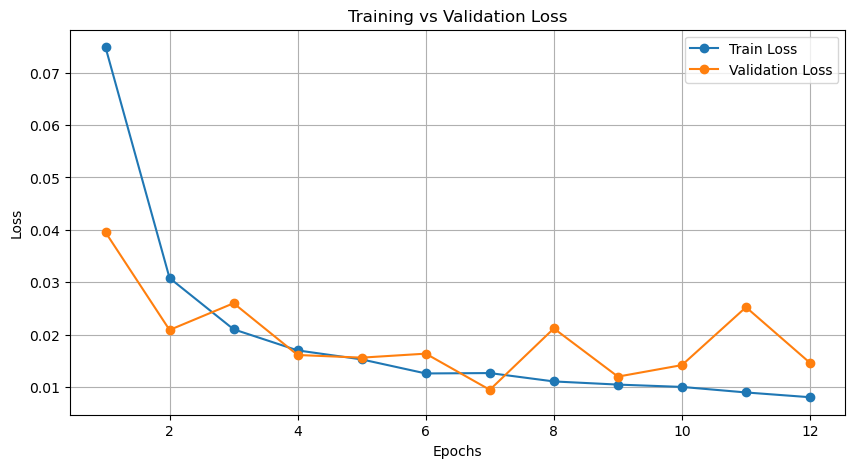

In [30]:
import json
import matplotlib.pyplot as plt

# Load the training metrics
with open("training_metrics.json", "r") as f:
    metrics = json.load(f)

# Extract values
train_losses = metrics["train_loss"]
val_losses = metrics["val_loss"]
epochs = range(1, len(train_losses) + 1)

# Plot Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label="Train Loss", marker="o")
plt.plot(epochs, val_losses, label="Validation Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


### More augmentations

In [1]:
# import os
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import transforms, models
# from torch.utils.data import Dataset, DataLoader
# from sklearn.model_selection import train_test_split
# from tqdm import tqdm
# from PIL import Image
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import json
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# # --- Custom Dataset ---
# class ImageDataset(Dataset):
#     def __init__(self, csv_file, img_dir, transform=None):
#         self.annotations = csv_file
#         self.img_dir = img_dir
#         self.transform = transform

#     def __len__(self):
#         return len(self.annotations)

#     def __getitem__(self, idx):
#         img_path = os.path.join(self.img_dir, self.annotations.iloc[idx, 0])
#         image = Image.open(img_path).convert("RGB")
#         label = torch.tensor(int(self.annotations.iloc[idx, 1]))

#         if self.transform:
#             image = self.transform(image)

#         return image, label

# # --- Early Stopping ---
# class EarlyStopping:
#     def __init__(self, patience=5, verbose=True):
#         self.patience = patience
#         self.verbose = verbose
#         self.counter = 0
#         self.best_loss = None
#         self.early_stop = False

#     def __call__(self, val_loss, model, optimizer, epoch, path="best_model.pth"):
#         if self.best_loss is None or val_loss < self.best_loss:
#             self.best_loss = val_loss
#             self.counter = 0
#             torch.save({
#                 "epoch": epoch,
#                 "model_state_dict": model.state_dict(),
#                 "optimizer_state_dict": optimizer.state_dict(),
#                 "best_loss": self.best_loss
#             }, path)
#             if self.verbose:
#                 print(f"Validation loss improved to {val_loss:.4f}. Checkpoint saved!")
#         else:
#             self.counter += 1
#             if self.verbose:
#                 print(f"No improvement. EarlyStopping counter: {self.counter}/{self.patience}")
#             if self.counter >= self.patience:
#                 self.early_stop = True

# # --- Data Preparation ---
# csv_path = "train.csv"
# train_df = pd.read_csv(csv_path)
# train_df["file_name"] = train_df["file_name"].str.replace("train_data/", "", regex=False)
# train_df = train_df.drop(columns=["Unnamed: 0"])

# train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

# train_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.RandomRotation(15),
#     transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
#     transforms.RandomAffine(degrees=15, translate=(0.05, 0.05), shear=5),
#     transforms.RandomCrop(200),
#     transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

# # Missing val_transform added here
# val_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

# img_dir = "train_data"
# train_dataset = ImageDataset(train_df, img_dir, transform=train_transform)
# val_dataset = ImageDataset(val_df, img_dir, transform=val_transform)

# batch_size = 64
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
# val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

# # --- Model Setup ---
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = models.resnet50(pretrained=True)
# num_features = model.fc.in_features
# model.fc = nn.Linear(num_features, 1)
# model = model.to(device)

# criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.Adam(model.parameters(), lr=1e-4) 

# # --- Resume Training ---
# def load_checkpoint(path, model, optimizer):
#     if os.path.exists(path):
#         checkpoint = torch.load(path)
#         model.load_state_dict(checkpoint["model_state_dict"])
#         optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
        
#         # Continue training from the last saved epoch
#         start_epoch = checkpoint["epoch"] + 1
#         best_val_loss = checkpoint["best_loss"]

#         print(f"Resuming training from epoch {start_epoch} with best validation loss {best_val_loss:.4f}")
#         return start_epoch, best_val_loss
#     else:
#         print("No checkpoint found. Starting from scratch.")
#         return 0, float("inf")

# # --- Training and Validation Functions ---
# def train_one_epoch(model, train_loader, criterion, optimizer, device):
#     model.train()
#     running_loss = 0.0

#     for images, labels in tqdm(train_loader, desc="Training"):
#         images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item() * images.size(0)

#     epoch_loss = running_loss / len(train_loader.dataset)
#     return epoch_loss

# def validate(model, val_loader, criterion, device):
#     model.eval()
#     running_loss = 0.0
#     all_labels = []
#     all_outputs = []

#     with torch.no_grad():
#         for images, labels in tqdm(val_loader, desc="Validation"):
#             images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

#             outputs = model(images)
#             loss = criterion(outputs, labels)

#             running_loss += loss.item() * images.size(0)
#             all_labels.append(labels.cpu().numpy())
#             all_outputs.append(outputs.cpu().numpy())

#     epoch_loss = running_loss / len(val_loader.dataset)
#     all_labels = np.concatenate(all_labels)
#     all_outputs = torch.sigmoid(torch.tensor(np.concatenate(all_outputs))).numpy()

#     # Compute Metrics
#     val_preds = (all_outputs > 0.5).astype(int)
#     accuracy = accuracy_score(all_labels, val_preds)
#     precision = precision_score(all_labels, val_preds)
#     recall = recall_score(all_labels, val_preds)
#     f1 = f1_score(all_labels, val_preds)
#     auc = roc_auc_score(all_labels, all_outputs)

#     return epoch_loss, accuracy, precision, recall, f1, auc

# # --- Main Training Script ---
# # Continue fine-tuning with more augmentations
# num_epochs = 20  # Define total epochs
# checkpoint_path = "best_model_finetuned.pth"  # Save to a new file to avoid overwriting the original
# start_epoch, best_val_loss = load_checkpoint("best_model_finetuned.pth", model, optimizer)  # Load checkpoint

# early_stopping = EarlyStopping(patience=5, verbose=True)

# train_losses = []
# val_losses = []
# val_accuracies = []

# for epoch in range(start_epoch, num_epochs):
#     print(f"Epoch {epoch+1}/{num_epochs}")

#     train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
#     train_losses.append(train_loss)

#     val_loss, accuracy, precision, recall, f1, auc = validate(model, val_loader, criterion, device)
#     val_losses.append(val_loss)
#     val_accuracies.append(accuracy)

#     print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
#           f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, "
#           f"F1-score: {f1:.4f}, AUC: {auc:.4f}")

#     early_stopping(val_loss, model, optimizer, epoch, path=checkpoint_path)

#     if early_stopping.early_stop:
#         print("Early stopping triggered!")
#         break

# # Save fine-tuned training metrics to a different file
# metrics = {"train_loss": train_losses, "val_loss": val_losses, "val_accuracy": val_accuracies}
# with open("training_metrics_finetuned.json", "w") as f:
#     json.dump(metrics, f)
# print("Saved fine-tuned training metrics to 'training_metrics_finetuned.json'")

# print("Fine-tuning Complete!")


C:\Users\asens\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\asens\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\asens\AppData\Local\Temp\ipykernel_28416\3008145641.py:113: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECU

Resuming training from epoch 10 with best validation loss 0.0562
Epoch 11/20


Validation: 100%|██████████| 250/250 [03:03<00:00,  1.36it/s]


Train Loss: 0.0686, Val Loss: 0.0473, Accuracy: 0.9836, Precision: 0.9853, Recall: 0.9817, F1-score: 0.9835, AUC: 0.9985
Validation loss improved to 0.0473. Checkpoint saved!
Epoch 12/20


Validation: 100%|██████████| 250/250 [01:57<00:00,  2.13it/s]


Train Loss: 0.0623, Val Loss: 0.0399, Accuracy: 0.9853, Precision: 0.9852, Recall: 0.9854, F1-score: 0.9853, AUC: 0.9989
Validation loss improved to 0.0399. Checkpoint saved!
Epoch 13/20


Training:  53%|█████▎    | 529/1000 [08:14<07:20,  1.07it/s]


KeyboardInterrupt: 

In [3]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Custom Dataset ---
class ImageDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.annotations = csv_file
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.annotations.iloc[idx, 0])
        image = Image.open(img_path).convert("RGB")
        label = torch.tensor(int(self.annotations.iloc[idx, 1]))

        if self.transform:
            image = self.transform(image)

        return image, label

# --- Early Stopping ---
class EarlyStopping:
    def __init__(self, patience=5, verbose=True):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss, model, optimizer, epoch, path="new_best_model.pth"):
        if self.best_loss is None or val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
            torch.save({
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "best_loss": self.best_loss
            }, path)
            if self.verbose:
                print(f"Validation loss improved to {val_loss:.4f}. Checkpoint saved!")
        else:
            self.counter += 1
            if self.verbose:
                print(f"No improvement. EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

# --- Data Preparation ---
csv_path = "train.csv"
train_df = pd.read_csv(csv_path)
train_df["file_name"] = train_df["file_name"].str.replace("train_data/", "", regex=False)
train_df = train_df.drop(columns=["Unnamed: 0"])

train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.RandomAffine(degrees=15, translate=(0.05, 0.05), shear=5),
    transforms.RandomCrop(200),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])



val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

img_dir = "train_data"
train_dataset = ImageDataset(train_df, img_dir, transform=train_transform)
val_dataset = ImageDataset(val_df, img_dir, transform=val_transform)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

# --- Model Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 1)  # Binary classification
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# --- Training and Validation Functions ---
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader, desc="Training"):
        images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    return epoch_loss

def validate(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_labels = []
    all_outputs = []

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            all_labels.append(labels.cpu().numpy())
            all_outputs.append(outputs.cpu().numpy())

    epoch_loss = running_loss / len(val_loader.dataset)
    all_labels = np.concatenate(all_labels)
    all_outputs = torch.sigmoid(torch.tensor(np.concatenate(all_outputs))).numpy()

    # Compute Metrics
    val_preds = (all_outputs > 0.5).astype(int)
    accuracy = accuracy_score(all_labels, val_preds)
    precision = precision_score(all_labels, val_preds)
    recall = recall_score(all_labels, val_preds)
    f1 = f1_score(all_labels, val_preds)
    auc = roc_auc_score(all_labels, all_outputs)

    return epoch_loss, accuracy, precision, recall, f1, auc

# --- Main Training Script ---
num_epochs = 20
checkpoint_path = "new_best_model.pth"  # Save this model separately
early_stopping = EarlyStopping(patience=5, verbose=True)

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}/{num_epochs}")

    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    val_loss, accuracy, precision, recall, f1, auc = validate(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(accuracy)

    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
          f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, "
          f"F1-score: {f1:.4f}, AUC: {auc:.4f}")

    # Save if validation improves
    early_stopping(val_loss, model, optimizer, epoch, path=checkpoint_path)

    if early_stopping.early_stop:
        print("Early stopping triggered!")
        break

# Save metrics
metrics = {"train_loss": train_losses, "val_loss": val_losses, "val_accuracy": val_accuracies}
with open("training_metrics_new.json", "w") as f:
    json.dump(metrics, f)
print("Saved training metrics to 'training_metrics_new.json'")

print("Training Complete.")


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\asens/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:06<00:00, 16.9MB/s]


Epoch 1/20


Validation: 100%|██████████| 250/250 [01:58<00:00,  2.11it/s]


Train Loss: 0.1485, Val Loss: 0.0475, Accuracy: 0.9851, Precision: 0.9825, Recall: 0.9879, F1-score: 0.9852, AUC: 0.9987
Validation loss improved to 0.0475. Checkpoint saved!
Epoch 2/20


Validation: 100%|██████████| 250/250 [02:51<00:00,  1.45it/s]


Train Loss: 0.0769, Val Loss: 0.0527, Accuracy: 0.9804, Precision: 0.9688, Recall: 0.9929, F1-score: 0.9807, AUC: 0.9985
No improvement. EarlyStopping counter: 1/5
Epoch 3/20


Validation: 100%|██████████| 250/250 [01:59<00:00,  2.10it/s]


Train Loss: 0.0596, Val Loss: 0.0449, Accuracy: 0.9831, Precision: 0.9747, Recall: 0.9919, F1-score: 0.9832, AUC: 0.9989
Validation loss improved to 0.0449. Checkpoint saved!
Epoch 4/20


Validation: 100%|██████████| 250/250 [01:55<00:00,  2.17it/s]


Train Loss: 0.0499, Val Loss: 0.0574, Accuracy: 0.9788, Precision: 0.9615, Recall: 0.9975, F1-score: 0.9792, AUC: 0.9993
No improvement. EarlyStopping counter: 1/5
Epoch 5/20


Validation: 100%|██████████| 250/250 [01:58<00:00,  2.12it/s]


Train Loss: 0.0434, Val Loss: 0.0353, Accuracy: 0.9872, Precision: 0.9887, Recall: 0.9857, F1-score: 0.9872, AUC: 0.9992
Validation loss improved to 0.0353. Checkpoint saved!
Epoch 6/20


Validation: 100%|██████████| 250/250 [01:58<00:00,  2.10it/s]


Train Loss: 0.0390, Val Loss: 0.0344, Accuracy: 0.9891, Precision: 0.9862, Recall: 0.9920, F1-score: 0.9891, AUC: 0.9992
Validation loss improved to 0.0344. Checkpoint saved!
Epoch 7/20


Validation: 100%|██████████| 250/250 [01:58<00:00,  2.11it/s]


Train Loss: 0.0351, Val Loss: 0.0389, Accuracy: 0.9871, Precision: 0.9817, Recall: 0.9926, F1-score: 0.9871, AUC: 0.9991
No improvement. EarlyStopping counter: 1/5
Epoch 8/20


Validation: 100%|██████████| 250/250 [01:58<00:00,  2.11it/s]


Train Loss: 0.0324, Val Loss: 0.0312, Accuracy: 0.9894, Precision: 0.9894, Recall: 0.9895, F1-score: 0.9894, AUC: 0.9994
Validation loss improved to 0.0312. Checkpoint saved!
Epoch 9/20


Validation: 100%|██████████| 250/250 [01:57<00:00,  2.12it/s]


Train Loss: 0.0292, Val Loss: 0.0376, Accuracy: 0.9876, Precision: 0.9868, Recall: 0.9884, F1-score: 0.9876, AUC: 0.9991
No improvement. EarlyStopping counter: 1/5
Epoch 10/20


Validation: 100%|██████████| 250/250 [01:59<00:00,  2.10it/s]


Train Loss: 0.0286, Val Loss: 0.0310, Accuracy: 0.9896, Precision: 0.9871, Recall: 0.9922, F1-score: 0.9896, AUC: 0.9994
Validation loss improved to 0.0310. Checkpoint saved!
Epoch 11/20


Validation: 100%|██████████| 250/250 [02:55<00:00,  1.43it/s]


Train Loss: 0.0268, Val Loss: 0.0464, Accuracy: 0.9846, Precision: 0.9749, Recall: 0.9949, F1-score: 0.9848, AUC: 0.9993
No improvement. EarlyStopping counter: 1/5
Epoch 12/20


Validation: 100%|██████████| 250/250 [01:59<00:00,  2.08it/s]


Train Loss: 0.0259, Val Loss: 0.0308, Accuracy: 0.9892, Precision: 0.9837, Recall: 0.9949, F1-score: 0.9892, AUC: 0.9995
Validation loss improved to 0.0308. Checkpoint saved!
Epoch 13/20


Validation: 100%|██████████| 250/250 [01:57<00:00,  2.13it/s]


Train Loss: 0.0260, Val Loss: 0.0297, Accuracy: 0.9880, Precision: 0.9798, Recall: 0.9965, F1-score: 0.9881, AUC: 0.9996
Validation loss improved to 0.0297. Checkpoint saved!
Epoch 14/20


Validation: 100%|██████████| 250/250 [01:57<00:00,  2.12it/s]


Train Loss: 0.0235, Val Loss: 0.0314, Accuracy: 0.9893, Precision: 0.9862, Recall: 0.9925, F1-score: 0.9893, AUC: 0.9994
No improvement. EarlyStopping counter: 1/5
Epoch 15/20


Validation: 100%|██████████| 250/250 [01:58<00:00,  2.11it/s]


Train Loss: 0.0220, Val Loss: 0.0640, Accuracy: 0.9787, Precision: 0.9628, Recall: 0.9960, F1-score: 0.9791, AUC: 0.9990
No improvement. EarlyStopping counter: 2/5
Epoch 16/20


Validation: 100%|██████████| 250/250 [01:56<00:00,  2.14it/s]


Train Loss: 0.0218, Val Loss: 0.0313, Accuracy: 0.9889, Precision: 0.9884, Recall: 0.9895, F1-score: 0.9889, AUC: 0.9995
No improvement. EarlyStopping counter: 3/5
Epoch 17/20


Validation: 100%|██████████| 250/250 [02:00<00:00,  2.07it/s]


Train Loss: 0.0204, Val Loss: 0.0290, Accuracy: 0.9902, Precision: 0.9889, Recall: 0.9915, F1-score: 0.9902, AUC: 0.9995
Validation loss improved to 0.0290. Checkpoint saved!
Epoch 18/20


Validation: 100%|██████████| 250/250 [01:59<00:00,  2.09it/s]


Train Loss: 0.0196, Val Loss: 0.0436, Accuracy: 0.9861, Precision: 0.9780, Recall: 0.9945, F1-score: 0.9862, AUC: 0.9993
No improvement. EarlyStopping counter: 1/5
Epoch 19/20


Validation: 100%|██████████| 250/250 [01:56<00:00,  2.15it/s]


Train Loss: 0.0182, Val Loss: 0.0283, Accuracy: 0.9899, Precision: 0.9861, Recall: 0.9937, F1-score: 0.9899, AUC: 0.9996
Validation loss improved to 0.0283. Checkpoint saved!
Epoch 20/20


Validation: 100%|██████████| 250/250 [01:56<00:00,  2.14it/s]

Train Loss: 0.0186, Val Loss: 0.0381, Accuracy: 0.9876, Precision: 0.9884, Recall: 0.9869, F1-score: 0.9876, AUC: 0.9992
No improvement. EarlyStopping counter: 1/5
Saved training metrics to 'training_metrics_new.json'
Training Complete.


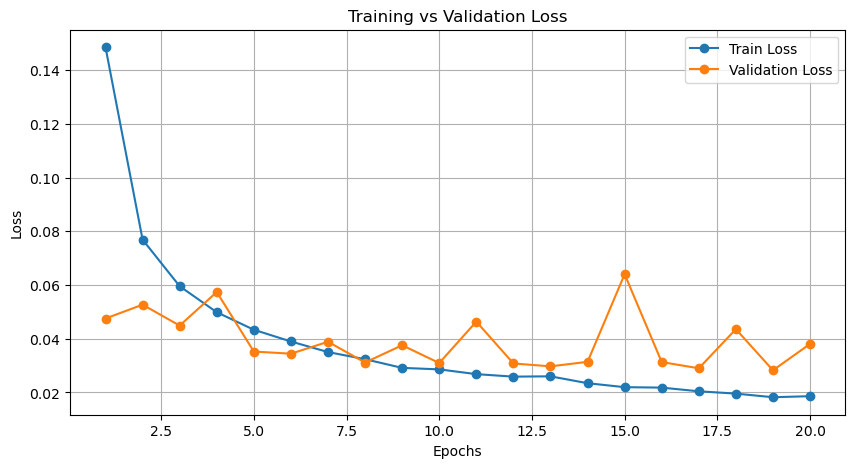

In [7]:
import json
import matplotlib.pyplot as plt

# Load the training metrics
with open("training_metrics_new.json", "r") as f:
    metrics = json.load(f)

# Extract values
train_losses = metrics["train_loss"]
val_losses = metrics["val_loss"]
epochs = range(1, len(train_losses) + 1)

# Plot Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label="Train Loss", marker="o")
plt.plot(epochs, val_losses, label="Validation Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
import torch
torch.cuda.empty_cache()  # Free up GPU memory


In [4]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
import pandas as pd
import numpy as np
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Custom Dataset ---
class ImageDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.annotations = csv_file
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.annotations.iloc[idx, 0])
        image = Image.open(img_path).convert("RGB")
        label = torch.tensor(int(self.annotations.iloc[idx, 1]))

        if self.transform:
            image = self.transform(image)

        return image, label

# --- Early Stopping ---
class EarlyStopping:
    def __init__(self, patience=5, verbose=True):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss, model, optimizer, epoch, path="best_efficientnet_b0.pth"):
        if self.best_loss is None or val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
            torch.save({
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "best_loss": self.best_loss
            }, path)
            if self.verbose:
                print(f"Validation loss improved to {val_loss:.4f}. Checkpoint saved!")
        else:
            self.counter += 1
            if self.verbose:
                print(f"No improvement. EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

# --- Data Preparation ---
csv_path = "train.csv"
train_df = pd.read_csv(csv_path)
train_df["file_name"] = train_df["file_name"].str.replace("train_data/", "", regex=False)
train_df = train_df.drop(columns=["Unnamed: 0"])

train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # EfficientNet-B0 input size
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # EfficientNet-B0 input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

img_dir = "train_data"
train_dataset = ImageDataset(train_df, img_dir, transform=train_transform)
val_dataset = ImageDataset(val_df, img_dir, transform=val_transform)

batch_size = 64  # Adjust batch size based on memory
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

# --- Model Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load EfficientNet-B0 with pre-trained weights
model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)

# Modify the classifier for binary classification
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, 1)  # Modify last layer for binary classification
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# --- Training and Validation Functions ---
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader, desc="Training"):
        images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    return epoch_loss

def validate(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_labels = []
    all_outputs = []

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            all_labels.append(labels.cpu().numpy())
            all_outputs.append(outputs.cpu().numpy())

    epoch_loss = running_loss / len(val_loader.dataset)
    all_labels = np.concatenate(all_labels)
    all_outputs = torch.sigmoid(torch.tensor(np.concatenate(all_outputs))).numpy()

    # Compute Metrics
    val_preds = (all_outputs > 0.5).astype(int)
    accuracy = accuracy_score(all_labels, val_preds)
    precision = precision_score(all_labels, val_preds)
    recall = recall_score(all_labels, val_preds)
    f1 = f1_score(all_labels, val_preds)
    auc = roc_auc_score(all_labels, all_outputs)

    return epoch_loss, accuracy, precision, recall, f1, auc

# --- Main Training Script ---
num_epochs = 10
checkpoint_path = "best_efficientnet_b0.pth"  # Save EfficientNet-B0 checkpoint
metrics_file = "training_metrics_efficientnet_b0.json"

early_stopping = EarlyStopping(patience=5, verbose=True)

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}/{num_epochs}")

    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    val_loss, accuracy, precision, recall, f1, auc = validate(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(accuracy)

    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}")

    early_stopping(val_loss, model, optimizer, epoch, path=checkpoint_path)

    if early_stopping.early_stop:
        print("Early stopping triggered!")
        break

# Save EfficientNet training metrics
with open(metrics_file, "w") as f:
    json.dump({"train_loss": train_losses, "val_loss": val_losses, "val_accuracy": val_accuracies}, f)

print("Training Complete.")


Epoch 1/10


Validation: 100%|██████████| 250/250 [02:48<00:00,  1.48it/s]


Train Loss: 0.0889, Val Loss: 0.0282, Accuracy: 0.9908
Validation loss improved to 0.0282. Checkpoint saved!
Epoch 2/10


Validation: 100%|██████████| 250/250 [01:40<00:00,  2.48it/s]


Train Loss: 0.0228, Val Loss: 0.0139, Accuracy: 0.9952
Validation loss improved to 0.0139. Checkpoint saved!
Epoch 3/10


Validation: 100%|██████████| 250/250 [01:44<00:00,  2.38it/s]


Train Loss: 0.0138, Val Loss: 0.0146, Accuracy: 0.9952
No improvement. EarlyStopping counter: 1/5
Epoch 4/10


Validation: 100%|██████████| 250/250 [01:40<00:00,  2.50it/s]


Train Loss: 0.0087, Val Loss: 0.0113, Accuracy: 0.9966
Validation loss improved to 0.0113. Checkpoint saved!
Epoch 5/10


Validation: 100%|██████████| 250/250 [01:40<00:00,  2.49it/s]


Train Loss: 0.0071, Val Loss: 0.0087, Accuracy: 0.9967
Validation loss improved to 0.0087. Checkpoint saved!
Epoch 6/10


Validation: 100%|██████████| 250/250 [01:40<00:00,  2.48it/s]


Train Loss: 0.0064, Val Loss: 0.0114, Accuracy: 0.9963
No improvement. EarlyStopping counter: 1/5
Epoch 7/10


Training:  56%|█████▋    | 565/1000 [05:13<04:01,  1.80it/s]


KeyboardInterrupt: 

In [6]:
def load_checkpoint(path, model, optimizer):
    if os.path.exists(path):
        checkpoint = torch.load(path)
        model.load_state_dict(checkpoint["model_state_dict"])
        optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
        start_epoch = checkpoint["epoch"] + 1
        best_val_loss = checkpoint["best_loss"]
        print(f"Resuming from epoch {start_epoch} with best validation loss {best_val_loss:.4f}")
        return start_epoch, best_val_loss
    else:
        print("No checkpoint found. Starting from scratch.")
        return 1, float("inf")  # Start from epoch 1 if no checkpoint exists


In [10]:
# --- Main Training Script ---
num_epochs = 20  # Increase the total number of epochs
checkpoint_path = "best_efficientnet_b0.pth"  # Path to the saved checkpoint
metrics_file = "training_metrics_efficientnet_b0.json"

early_stopping = EarlyStopping(patience=5, verbose=True)

# Initialize metrics
train_losses = []
val_losses = []
val_accuracies = []

# Load the last checkpoint if it exists
start_epoch, best_val_loss = load_checkpoint(checkpoint_path, model, optimizer)

for epoch in range(start_epoch, num_epochs + 1):
    print(f"Epoch {epoch}/{num_epochs}")

    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    val_loss, accuracy, precision, recall, f1, auc = validate(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(accuracy)

    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}")

    early_stopping(val_loss, model, optimizer, epoch, path=checkpoint_path)

    if early_stopping.early_stop:
        print("Early stopping triggered!")
        break

# Save updated metrics
with open(metrics_file, "w") as f:
    json.dump({"train_loss": train_losses, "val_loss": val_losses, "val_accuracy": val_accuracies}, f)

print("Training Complete.")


C:\Users\asens\AppData\Local\Temp\ipykernel_71560\3563811185.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Resuming from epoch 6 with best validation loss 0.0087
Epoch 6/20


Validation: 100%|██████████| 250/250 [01:40<00:00,  2.50it/s]


Train Loss: 0.0059, Val Loss: 0.0134, Accuracy: 0.9956
Validation loss improved to 0.0134. Checkpoint saved!
Epoch 7/20


Validation: 100%|██████████| 250/250 [01:38<00:00,  2.53it/s]


Train Loss: 0.0048, Val Loss: 0.0110, Accuracy: 0.9962
Validation loss improved to 0.0110. Checkpoint saved!
Epoch 8/20


Validation: 100%|██████████| 250/250 [01:39<00:00,  2.52it/s]


Train Loss: 0.0052, Val Loss: 0.0098, Accuracy: 0.9967
Validation loss improved to 0.0098. Checkpoint saved!
Epoch 9/20


Validation: 100%|██████████| 250/250 [01:38<00:00,  2.53it/s]


Train Loss: 0.0043, Val Loss: 0.0108, Accuracy: 0.9969
No improvement. EarlyStopping counter: 1/5
Epoch 10/20


Validation: 100%|██████████| 250/250 [01:38<00:00,  2.53it/s]


Train Loss: 0.0031, Val Loss: 0.0121, Accuracy: 0.9964
No improvement. EarlyStopping counter: 2/5
Epoch 11/20


Validation: 100%|██████████| 250/250 [01:39<00:00,  2.52it/s]


Train Loss: 0.0038, Val Loss: 0.0082, Accuracy: 0.9973
Validation loss improved to 0.0082. Checkpoint saved!
Epoch 12/20


Validation: 100%|██████████| 250/250 [01:39<00:00,  2.51it/s]


Train Loss: 0.0036, Val Loss: 0.0093, Accuracy: 0.9971
No improvement. EarlyStopping counter: 1/5
Epoch 13/20


Validation: 100%|██████████| 250/250 [01:38<00:00,  2.53it/s]


Train Loss: 0.0032, Val Loss: 0.0078, Accuracy: 0.9974
Validation loss improved to 0.0078. Checkpoint saved!
Epoch 14/20


Validation: 100%|██████████| 250/250 [01:39<00:00,  2.52it/s]


Train Loss: 0.0027, Val Loss: 0.0122, Accuracy: 0.9961
No improvement. EarlyStopping counter: 1/5
Epoch 15/20


Validation: 100%|██████████| 250/250 [01:38<00:00,  2.53it/s]


Train Loss: 0.0027, Val Loss: 0.0140, Accuracy: 0.9957
No improvement. EarlyStopping counter: 2/5
Epoch 16/20


Validation: 100%|██████████| 250/250 [01:38<00:00,  2.53it/s]


Train Loss: 0.0024, Val Loss: 0.0108, Accuracy: 0.9975
No improvement. EarlyStopping counter: 3/5
Epoch 17/20


Validation: 100%|██████████| 250/250 [01:38<00:00,  2.53it/s]


Train Loss: 0.0018, Val Loss: 0.0094, Accuracy: 0.9971
No improvement. EarlyStopping counter: 4/5
Epoch 18/20


Validation: 100%|██████████| 250/250 [01:40<00:00,  2.50it/s]

Train Loss: 0.0026, Val Loss: 0.0099, Accuracy: 0.9969
No improvement. EarlyStopping counter: 5/5
Early stopping triggered!
Training Complete.


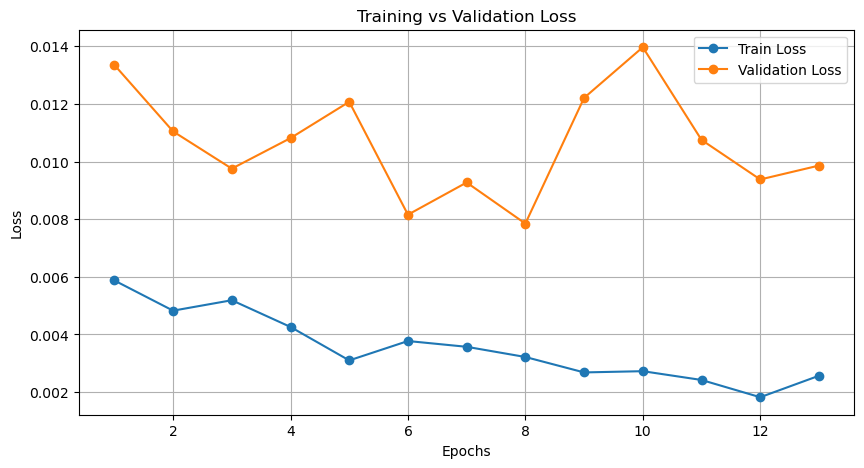

In [2]:
import json
import matplotlib.pyplot as plt

# Load the training metrics
with open("training_metrics_efficientnet_b0.json", "r") as f:
    metrics = json.load(f)

# Extract values
train_losses = metrics["train_loss"]
val_losses = metrics["val_loss"]
epochs = range(1, len(train_losses) + 1)

# Plot Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label="Train Loss", marker="o")
plt.plot(epochs, val_losses, label="Validation Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
import pandas as pd
import numpy as np
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Custom Dataset ---
class ImageDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.annotations = csv_file
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.annotations.iloc[idx, 0])
        image = Image.open(img_path).convert("RGB")
        label = torch.tensor(int(self.annotations.iloc[idx, 1]))

        if self.transform:
            image = self.transform(image)

        return image, label

# --- Early Stopping ---
class EarlyStopping:
    def __init__(self, patience=5, verbose=True):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss, model, optimizer, epoch, path="best_mobilenetv2.pth"):
        if self.best_loss is None or val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
            torch.save({
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "best_loss": self.best_loss
            }, path)
            if self.verbose:
                print(f"Validation loss improved to {val_loss:.4f}. Checkpoint saved!")
        else:
            self.counter += 1
            if self.verbose:
                print(f"No improvement. EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

# --- Data Preparation ---
csv_path = "train.csv"
train_df = pd.read_csv(csv_path)
train_df["file_name"] = train_df["file_name"].str.replace("train_data/", "", regex=False)
train_df = train_df.drop(columns=["Unnamed: 0"])

train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # MobileNetV2 input size
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # MobileNetV2 input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

img_dir = "train_data"
train_dataset = ImageDataset(train_df, img_dir, transform=train_transform)
val_dataset = ImageDataset(val_df, img_dir, transform=val_transform)

batch_size = 64  # MobileNetV2 allows a large batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

# --- Model Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MobileNetV2 with pre-trained weights
model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)

# Modify the classifier for binary classification
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, 1)  # Modify last layer for binary classification
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# --- Training and Validation Functions ---
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader, desc="Training"):
        images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    return epoch_loss

def validate(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_labels = []
    all_outputs = []

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            all_labels.append(labels.cpu().numpy())
            all_outputs.append(outputs.cpu().numpy())

    epoch_loss = running_loss / len(val_loader.dataset)
    all_labels = np.concatenate(all_labels)
    all_outputs = torch.sigmoid(torch.tensor(np.concatenate(all_outputs))).numpy()

    # Compute Metrics
    val_preds = (all_outputs > 0.5).astype(int)
    accuracy = accuracy_score(all_labels, val_preds)
    precision = precision_score(all_labels, val_preds)
    recall = recall_score(all_labels, val_preds)
    f1 = f1_score(all_labels, val_preds)
    auc = roc_auc_score(all_labels, all_outputs)

    return epoch_loss, accuracy, precision, recall, f1, auc

# --- Main Training Script ---
num_epochs = 10
checkpoint_path = "best_mobilenetv2.pth"  # Save MobileNetV2 separately
metrics_file = "training_metrics_mobilenetv2.json"

early_stopping = EarlyStopping(patience=5, verbose=True)

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}/{num_epochs}")

    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    val_loss, accuracy, precision, recall, f1, auc = validate(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(accuracy)

    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}")

    early_stopping(val_loss, model, optimizer, epoch, path=checkpoint_path)

    if early_stopping.early_stop:
        print("Early stopping triggered!")
        break

# Save MobileNet training metrics
with open(metrics_file, "w") as f:
    json.dump({"train_loss": train_losses, "val_loss": val_losses, "val_accuracy": val_accuracies}, f)

print("Training Complete.")


Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to C:\Users\asens/.cache\torch\hub\checkpoints\mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:01<00:00, 10.6MB/s]


Epoch 1/10


Validation: 100%|██████████| 250/250 [02:47<00:00,  1.50it/s]


Train Loss: 0.0972, Val Loss: 0.0230, Accuracy: 0.9921
Validation loss improved to 0.0230. Checkpoint saved!
Epoch 2/10


Validation: 100%|██████████| 250/250 [01:40<00:00,  2.49it/s]


Train Loss: 0.0211, Val Loss: 0.0126, Accuracy: 0.9961
Validation loss improved to 0.0126. Checkpoint saved!
Epoch 3/10


Validation: 100%|██████████| 250/250 [01:40<00:00,  2.49it/s]


Train Loss: 0.0107, Val Loss: 0.0123, Accuracy: 0.9956
Validation loss improved to 0.0123. Checkpoint saved!
Epoch 4/10


Validation: 100%|██████████| 250/250 [01:39<00:00,  2.51it/s]


Train Loss: 0.0075, Val Loss: 0.0131, Accuracy: 0.9952
No improvement. EarlyStopping counter: 1/5
Epoch 5/10


Validation: 100%|██████████| 250/250 [01:40<00:00,  2.50it/s]


Train Loss: 0.0057, Val Loss: 0.0128, Accuracy: 0.9962
No improvement. EarlyStopping counter: 2/5
Epoch 6/10


Validation: 100%|██████████| 250/250 [01:40<00:00,  2.49it/s]


Train Loss: 0.0048, Val Loss: 0.0115, Accuracy: 0.9966
Validation loss improved to 0.0115. Checkpoint saved!
Epoch 7/10


Validation: 100%|██████████| 250/250 [01:39<00:00,  2.50it/s]


Train Loss: 0.0048, Val Loss: 0.0113, Accuracy: 0.9969
Validation loss improved to 0.0113. Checkpoint saved!
Epoch 8/10


Validation: 100%|██████████| 250/250 [01:42<00:00,  2.43it/s]


Train Loss: 0.0040, Val Loss: 0.0093, Accuracy: 0.9977
Validation loss improved to 0.0093. Checkpoint saved!
Epoch 9/10


Validation: 100%|██████████| 250/250 [01:40<00:00,  2.50it/s]


Train Loss: 0.0044, Val Loss: 0.0098, Accuracy: 0.9976
No improvement. EarlyStopping counter: 1/5
Epoch 10/10


Validation: 100%|██████████| 250/250 [01:39<00:00,  2.51it/s]

Train Loss: 0.0035, Val Loss: 0.0116, Accuracy: 0.9964
No improvement. EarlyStopping counter: 2/5
Training Complete.


In [8]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
import pandas as pd
import numpy as np
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Custom Dataset ---
class ImageDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.annotations = csv_file
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.annotations.iloc[idx, 0])
        image = Image.open(img_path).convert("RGB")
        label = torch.tensor(int(self.annotations.iloc[idx, 1]))

        if self.transform:
            image = self.transform(image)

        return image, label

# --- Early Stopping ---
class EarlyStopping:
    def __init__(self, patience=5, verbose=True):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss, model, optimizer, epoch, path="best_mobilenetv2.pth"):
        if self.best_loss is None or val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
            torch.save({
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "best_loss": self.best_loss
            }, path)
            if self.verbose:
                print(f"Validation loss improved to {val_loss:.4f}. Checkpoint saved!")
        else:
            self.counter += 1
            if self.verbose:
                print(f"No improvement. EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

# --- Function to Load Checkpoint ---
def load_checkpoint(path, model, optimizer):
    if os.path.exists(path):
        checkpoint = torch.load(path)
        model.load_state_dict(checkpoint["model_state_dict"])
        optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
        start_epoch = checkpoint["epoch"] + 1
        best_loss = checkpoint["best_loss"]
        print(f"Resumed from checkpoint. Starting from epoch {start_epoch}. Best validation loss: {best_loss:.4f}")
        return model, optimizer, start_epoch, best_loss
    else:
        print("No checkpoint found. Starting from scratch.")
        return model, optimizer, 1, float("inf")

# --- Data Preparation ---
csv_path = "train.csv"
train_df = pd.read_csv(csv_path)
train_df["file_name"] = train_df["file_name"].str.replace("train_data/", "", regex=False)
train_df = train_df.drop(columns=["Unnamed: 0"])

train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # MobileNetV2 input size
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # MobileNetV2 input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

img_dir = "train_data"
train_dataset = ImageDataset(train_df, img_dir, transform=train_transform)
val_dataset = ImageDataset(val_df, img_dir, transform=val_transform)
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

# --- Model Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, 1)
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# --- Main Training Script ---
checkpoint_path = "best_mobilenetv2.pth"
metrics_file = "training_metrics_mobilenetv2.json"
early_stopping = EarlyStopping(patience=5, verbose=True)

# Load checkpoint if it exists
model, optimizer, start_epoch, best_loss = load_checkpoint(checkpoint_path, model, optimizer)

num_epochs = 20  # New total number of epochs
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(start_epoch, num_epochs + 1):
    print(f"Epoch {epoch}/{num_epochs}")

    # Training
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc="Training"):
        images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    running_loss = 0.0
    all_labels = []
    all_outputs = []
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            all_labels.append(labels.cpu().numpy())
            all_outputs.append(outputs.cpu().numpy())
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    all_labels = np.concatenate(all_labels)
    all_outputs = torch.sigmoid(torch.tensor(np.concatenate(all_outputs))).numpy()
    val_preds = (all_outputs > 0.5).astype(int)
    accuracy = accuracy_score(all_labels, val_preds)
    precision = precision_score(all_labels, val_preds)
    recall = recall_score(all_labels, val_preds)
    f1 = f1_score(all_labels, val_preds)
    auc = roc_auc_score(all_labels, all_outputs)
    val_accuracies.append(accuracy)

    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}")

    # Early stopping
    early_stopping(val_loss, model, optimizer, epoch, path=checkpoint_path)
    if early_stopping.early_stop:
        print("Early stopping triggered!")
        break

# Save metrics
with open(metrics_file, "w") as f:
    json.dump({
        "train_loss": train_losses,
        "val_loss": val_losses,
        "val_accuracy": val_accuracies
    }, f)

print("Training Complete.")


C:\Users\asens\AppData\Local\Temp\ipykernel_31708\2346481408.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Resumed from checkpoint. Starting from epoch 17. Best validation loss: 0.0081
Epoch 17/20


Training:  14%|█▎        | 135/1000 [02:02<13:02,  1.11it/s]


KeyboardInterrupt: 

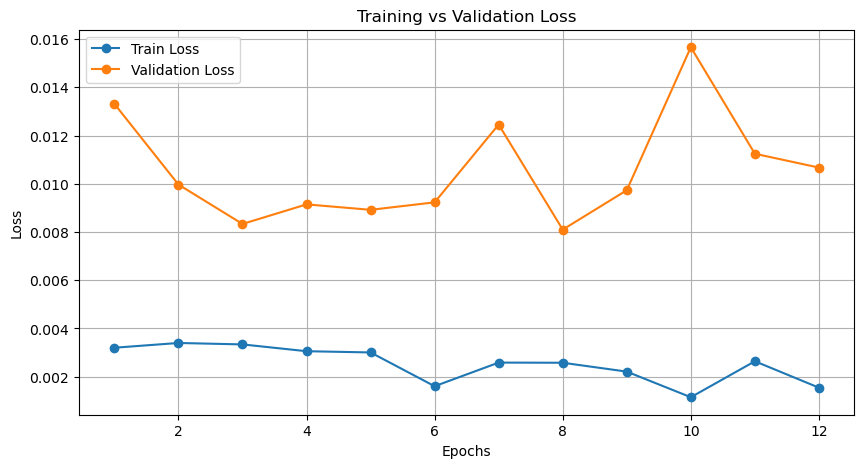

In [6]:
import json
import matplotlib.pyplot as plt

# Load the training metrics
with open("training_metrics_mobilenetv2.json", "r") as f:
    metrics = json.load(f)

# Extract values
train_losses = metrics["train_loss"]
val_losses = metrics["val_loss"]
epochs = range(1, len(train_losses) + 1)

# Plot Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label="Train Loss", marker="o")
plt.plot(epochs, val_losses, label="Validation Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
import pandas as pd
import numpy as np
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Custom Dataset ---
class ImageDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.annotations = csv_file
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.annotations.iloc[idx, 0])
        image = Image.open(img_path).convert("RGB")
        label = torch.tensor(int(self.annotations.iloc[idx, 1]))

        if self.transform:
            image = self.transform(image)

        return image, label

# --- Early Stopping ---
class EarlyStopping:
    def __init__(self, patience=5, verbose=True):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss, model, optimizer, epoch, path="best_efficientnet_b0_augmented.pth"):  # Updated path
        if self.best_loss is None or val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
            torch.save({
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "best_loss": self.best_loss
            }, path)
            if self.verbose:
                print(f"Validation loss improved to {val_loss:.4f}. Checkpoint saved!")
        else:
            self.counter += 1
            if self.verbose:
                print(f"No improvement. EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True


# --- Data Preparation ---
csv_path = "train.csv"
train_df = pd.read_csv(csv_path)
train_df["file_name"] = train_df["file_name"].str.replace("train_data/", "", regex=False)
train_df = train_df.drop(columns=["Unnamed: 0"])

train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # EfficientNet-B0 input size
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), shear=10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # EfficientNet-B0 input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

img_dir = "train_data"
train_dataset = ImageDataset(train_df, img_dir, transform=train_transform)
val_dataset = ImageDataset(val_df, img_dir, transform=val_transform)

batch_size = 64  # Adjust batch size based on memory
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

# --- Model Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load EfficientNet-B0 with pre-trained weights
model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)

# Modify the classifier for binary classification
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, 1)  # Modify last layer for binary classification
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=5e-5)  # Reduced learning rate for stability

# --- Training and Validation Functions ---
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader, desc="Training"):
        images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    return epoch_loss

def validate(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_labels = []
    all_outputs = []

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            all_labels.append(labels.cpu().numpy())
            all_outputs.append(outputs.cpu().numpy())

    epoch_loss = running_loss / len(val_loader.dataset)
    all_labels = np.concatenate(all_labels)
    all_outputs = torch.sigmoid(torch.tensor(np.concatenate(all_outputs))).numpy()

    # Compute Metrics
    val_preds = (all_outputs > 0.5).astype(int)
    accuracy = accuracy_score(all_labels, val_preds)
    precision = precision_score(all_labels, val_preds)
    recall = recall_score(all_labels, val_preds)
    f1 = f1_score(all_labels, val_preds)
    auc = roc_auc_score(all_labels, all_outputs)

    return epoch_loss, accuracy, precision, recall, f1, auc

# --- Main Training Script ---
num_epochs = 10
checkpoint_path = "best_efficientnet_b0_augmented.pth"  # New file for augmented training
metrics_file = "training_metrics_efficientnet_b0_augmented.json"  # Save metrics separately


early_stopping = EarlyStopping(patience=5, verbose=True)

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}/{num_epochs}")

    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    val_loss, accuracy, precision, recall, f1, auc = validate(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(accuracy)

    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}")

    early_stopping(val_loss, model, optimizer, epoch, path=checkpoint_path)

    if early_stopping.early_stop:
        print("Early stopping triggered!")
        break

# Save EfficientNet training metrics
with open(metrics_file, "w") as f:
    json.dump({
        "train_loss": train_losses,
        "val_loss": val_losses,
        "val_accuracy": val_accuracies
    }, f)

print("Training Complete.")


Epoch 1/10


Validation: 100%|██████████| 250/250 [03:04<00:00,  1.36it/s]


Train Loss: 0.1842, Val Loss: 0.1205, Accuracy: 0.9540
Validation loss improved to 0.1205. Checkpoint saved!
Epoch 2/10


Validation: 100%|██████████| 250/250 [01:52<00:00,  2.23it/s]


Train Loss: 0.0927, Val Loss: 0.0946, Accuracy: 0.9652
Validation loss improved to 0.0946. Checkpoint saved!
Epoch 3/10


Validation: 100%|██████████| 250/250 [01:52<00:00,  2.22it/s]


Train Loss: 0.0712, Val Loss: 0.0778, Accuracy: 0.9712
Validation loss improved to 0.0778. Checkpoint saved!
Epoch 4/10


Validation: 100%|██████████| 250/250 [01:52<00:00,  2.23it/s]


Train Loss: 0.0578, Val Loss: 0.0639, Accuracy: 0.9773
Validation loss improved to 0.0639. Checkpoint saved!
Epoch 5/10


Validation: 100%|██████████| 250/250 [01:53<00:00,  2.21it/s]


Train Loss: 0.0499, Val Loss: 0.0699, Accuracy: 0.9740
No improvement. EarlyStopping counter: 1/5
Epoch 6/10


Validation: 100%|██████████| 250/250 [01:53<00:00,  2.20it/s]


Train Loss: 0.0422, Val Loss: 0.0570, Accuracy: 0.9789
Validation loss improved to 0.0570. Checkpoint saved!
Epoch 7/10


Training:  20%|██        | 203/1000 [02:46<10:54,  1.22it/s]


KeyboardInterrupt: 

In [14]:
# --- Function to Load Checkpoint ---
def load_checkpoint(path, model, optimizer):
    if os.path.exists(path):
        checkpoint = torch.load(path)
        model.load_state_dict(checkpoint["model_state_dict"])
        optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
        start_epoch = checkpoint["epoch"] + 1
        best_loss = checkpoint["best_loss"]
        print(f"Resumed from checkpoint. Starting from epoch {start_epoch}. Best validation loss: {best_loss:.4f}")
        return model, optimizer, start_epoch, best_loss
    else:
        print("No checkpoint found. Starting from scratch.")
        return model, optimizer, 1, float("inf")

# --- Main Script to Continue Training ---
checkpoint_path = "best_efficientnet_b0_augmented.pth"  # Existing checkpoint file
metrics_file = "training_metrics_efficientnet_b0_augmented_continued.json"  # New metrics file for continued training

# Load checkpoint if it exists
model, optimizer, start_epoch, best_loss = load_checkpoint(checkpoint_path, model, optimizer)

num_epochs = 20  # Total number of epochs for the continued training
train_losses = []
val_losses = []
val_accuracies = []

# Initialize EarlyStopping again
early_stopping = EarlyStopping(patience=5, verbose=True)

for epoch in range(start_epoch, num_epochs + 1):
    print(f"Epoch {epoch}/{num_epochs}")

    # Training
    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    # Validation
    val_loss, accuracy, precision, recall, f1, auc = validate(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(accuracy)

    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
          f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, "
          f"F1-score: {f1:.4f}, AUC: {auc:.4f}")

    # Early Stopping
    early_stopping(val_loss, model, optimizer, epoch, path=checkpoint_path)

    if early_stopping.early_stop:
        print("Early stopping triggered!")
        break

# Save new metrics for the continued training
with open(metrics_file, "w") as f:
    json.dump({
        "train_loss": train_losses,
        "val_loss": val_losses,
        "val_accuracy": val_accuracies
    }, f)

print("Continued Training Complete.")


C:\Users\asens\AppData\Local\Temp\ipykernel_31708\331849487.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Resumed from checkpoint. Starting from epoch 7. Best validation loss: 0.0570
Epoch 7/20


Validation: 100%|██████████| 250/250 [01:52<00:00,  2.23it/s]


Train Loss: 0.0361, Val Loss: 0.0454, Accuracy: 0.9832, Precision: 0.9752, Recall: 0.9917, F1-score: 0.9834, AUC: 0.9990
Validation loss improved to 0.0454. Checkpoint saved!
Epoch 8/20


Validation: 100%|██████████| 250/250 [01:52<00:00,  2.22it/s]


Train Loss: 0.0324, Val Loss: 0.0563, Accuracy: 0.9793, Precision: 0.9655, Recall: 0.9941, F1-score: 0.9796, AUC: 0.9989
No improvement. EarlyStopping counter: 1/5
Epoch 9/20


Validation: 100%|██████████| 250/250 [01:53<00:00,  2.20it/s]


Train Loss: 0.0300, Val Loss: 0.0450, Accuracy: 0.9842, Precision: 0.9764, Recall: 0.9924, F1-score: 0.9843, AUC: 0.9991
Validation loss improved to 0.0450. Checkpoint saved!
Epoch 10/20


Validation: 100%|██████████| 250/250 [01:52<00:00,  2.22it/s]


Train Loss: 0.0262, Val Loss: 0.0617, Accuracy: 0.9797, Precision: 0.9659, Recall: 0.9946, F1-score: 0.9800, AUC: 0.9990
No improvement. EarlyStopping counter: 1/5
Epoch 11/20


Validation: 100%|██████████| 250/250 [01:52<00:00,  2.23it/s]


Train Loss: 0.0227, Val Loss: 0.0516, Accuracy: 0.9822, Precision: 0.9715, Recall: 0.9935, F1-score: 0.9824, AUC: 0.9991
No improvement. EarlyStopping counter: 2/5
Epoch 12/20


Validation: 100%|██████████| 250/250 [01:52<00:00,  2.22it/s]


Train Loss: 0.0222, Val Loss: 0.0446, Accuracy: 0.9858, Precision: 0.9781, Recall: 0.9939, F1-score: 0.9859, AUC: 0.9992
Validation loss improved to 0.0446. Checkpoint saved!
Epoch 13/20


Validation: 100%|██████████| 250/250 [01:53<00:00,  2.21it/s]


Train Loss: 0.0194, Val Loss: 0.0469, Accuracy: 0.9844, Precision: 0.9777, Recall: 0.9914, F1-score: 0.9845, AUC: 0.9989
No improvement. EarlyStopping counter: 1/5
Epoch 14/20


Validation: 100%|██████████| 250/250 [01:53<00:00,  2.20it/s]


Train Loss: 0.0183, Val Loss: 0.0610, Accuracy: 0.9790, Precision: 0.9654, Recall: 0.9937, F1-score: 0.9794, AUC: 0.9989
No improvement. EarlyStopping counter: 2/5
Epoch 15/20


Validation: 100%|██████████| 250/250 [01:52<00:00,  2.22it/s]


Train Loss: 0.0174, Val Loss: 0.0469, Accuracy: 0.9844, Precision: 0.9761, Recall: 0.9931, F1-score: 0.9846, AUC: 0.9993
No improvement. EarlyStopping counter: 3/5
Epoch 16/20


Validation: 100%|██████████| 250/250 [01:52<00:00,  2.22it/s]


Train Loss: 0.0145, Val Loss: 0.0729, Accuracy: 0.9786, Precision: 0.9638, Recall: 0.9946, F1-score: 0.9789, AUC: 0.9989
No improvement. EarlyStopping counter: 4/5
Epoch 17/20


Validation: 100%|██████████| 250/250 [01:53<00:00,  2.20it/s]

Train Loss: 0.0144, Val Loss: 0.0584, Accuracy: 0.9833, Precision: 0.9733, Recall: 0.9939, F1-score: 0.9835, AUC: 0.9991
No improvement. EarlyStopping counter: 5/5
Early stopping triggered!
Continued Training Complete.


In [5]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
import pandas as pd
import numpy as np
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Custom Dataset ---
class ImageDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.annotations = csv_file
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.annotations.iloc[idx, 0])
        image = Image.open(img_path).convert("RGB")
        label = torch.tensor(int(self.annotations.iloc[idx, 1]))

        if self.transform:
            image = self.transform(image)

        return image, label

# --- Early Stopping ---
class EarlyStopping:
    def __init__(self, patience=5, verbose=True):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss, model, optimizer, epoch, path="best_convnext_tiny.pth"):
        if self.best_loss is None or val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
            torch.save({
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "best_loss": self.best_loss
            }, path)
            if self.verbose:
                print(f"Validation loss improved to {val_loss:.4f}. Checkpoint saved!")
        else:
            self.counter += 1
            if self.verbose:
                print(f"No improvement. EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

# --- Data Preparation ---
csv_path = "train.csv"
train_df = pd.read_csv(csv_path)
train_df["file_name"] = train_df["file_name"].str.replace("train_data/", "", regex=False)
train_df = train_df.drop(columns=["Unnamed: 0"])

train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ConvNeXt input size
    transforms.RandomRotation(degrees=15),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

img_dir = "train_data"
train_dataset = ImageDataset(train_df, img_dir, transform=train_transform)
val_dataset = ImageDataset(val_df, img_dir, transform=val_transform)

batch_size = 64  # Reduce batch size if needed based on GPU memory
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

# --- Model Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load ConvNeXt-Tiny with pre-trained weights
model = models.convnext_tiny(weights=models.ConvNeXt_Tiny_Weights.IMAGENET1K_V1)

# Modify the classifier for binary classification
num_features = model.classifier[2].in_features
model.classifier[2] = nn.Linear(num_features, 1)  # Modify last layer for binary classification
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)  # Use AdamW optimizer for better stability

# --- Training and Validation Functions ---
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader, desc="Training"):
        images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    return epoch_loss

def validate(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_labels = []
    all_outputs = []

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            all_labels.append(labels.cpu().numpy())
            all_outputs.append(outputs.cpu().numpy())

    epoch_loss = running_loss / len(val_loader.dataset)
    all_labels = np.concatenate(all_labels)
    all_outputs = torch.sigmoid(torch.tensor(np.concatenate(all_outputs))).numpy()

    # Compute Metrics
    val_preds = (all_outputs > 0.5).astype(int)
    accuracy = accuracy_score(all_labels, val_preds)
    precision = precision_score(all_labels, val_preds)
    recall = recall_score(all_labels, val_preds)
    f1 = f1_score(all_labels, val_preds)
    auc = roc_auc_score(all_labels, all_outputs)

    return epoch_loss, accuracy, precision, recall, f1, auc

# --- Main Training Script ---
num_epochs = 20
checkpoint_path = "best_convnext_tiny.pth"
metrics_file = "training_metrics_convnext_tiny.json"

early_stopping = EarlyStopping(patience=5, verbose=True)

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}/{num_epochs}")

    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    val_loss, accuracy, precision, recall, f1, auc = validate(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(accuracy)

    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}")

    early_stopping(val_loss, model, optimizer, epoch, path=checkpoint_path)

    if early_stopping.early_stop:
        print("Early stopping triggered!")
        break

# Save ConvNeXt training metrics
with open(metrics_file, "w") as f:
    json.dump({
        "train_loss": train_losses,
        "val_loss": val_losses,
        "val_accuracy": val_accuracies
    }, f)

print("Training Complete.")


Using device: cuda
Epoch 1/20


Validation: 100%|██████████| 250/250 [01:52<00:00,  2.23it/s]


Train Loss: 0.0543, Val Loss: 0.0137, Accuracy: 0.9958
Validation loss improved to 0.0137. Checkpoint saved!
Epoch 2/20


Validation: 100%|██████████| 250/250 [01:50<00:00,  2.26it/s]


Train Loss: 0.0158, Val Loss: 0.0187, Accuracy: 0.9938
No improvement. EarlyStopping counter: 1/5
Epoch 3/20


Validation: 100%|██████████| 250/250 [01:50<00:00,  2.26it/s]


Train Loss: 0.0147, Val Loss: 0.0128, Accuracy: 0.9952
Validation loss improved to 0.0128. Checkpoint saved!
Epoch 4/20


Validation: 100%|██████████| 250/250 [01:51<00:00,  2.24it/s]


Train Loss: 0.0097, Val Loss: 0.0152, Accuracy: 0.9947
No improvement. EarlyStopping counter: 1/5
Epoch 5/20


Validation: 100%|██████████| 250/250 [01:51<00:00,  2.24it/s]


Train Loss: 0.0092, Val Loss: 0.0100, Accuracy: 0.9971
Validation loss improved to 0.0100. Checkpoint saved!
Epoch 6/20


Validation: 100%|██████████| 250/250 [01:51<00:00,  2.24it/s]


Train Loss: 0.0084, Val Loss: 0.0143, Accuracy: 0.9959
No improvement. EarlyStopping counter: 1/5
Epoch 7/20


Validation: 100%|██████████| 250/250 [01:51<00:00,  2.24it/s]


Train Loss: 0.0073, Val Loss: 0.0077, Accuracy: 0.9981
Validation loss improved to 0.0077. Checkpoint saved!
Epoch 8/20


Validation: 100%|██████████| 250/250 [01:51<00:00,  2.24it/s]


Train Loss: 0.0067, Val Loss: 0.0054, Accuracy: 0.9980
Validation loss improved to 0.0054. Checkpoint saved!
Epoch 9/20


Validation: 100%|██████████| 250/250 [01:51<00:00,  2.24it/s]


Train Loss: 0.0060, Val Loss: 0.0088, Accuracy: 0.9974
No improvement. EarlyStopping counter: 1/5
Epoch 10/20


Validation: 100%|██████████| 250/250 [01:52<00:00,  2.23it/s]


Train Loss: 0.0063, Val Loss: 0.0059, Accuracy: 0.9976
No improvement. EarlyStopping counter: 2/5
Epoch 11/20


Validation: 100%|██████████| 250/250 [01:51<00:00,  2.24it/s]


Train Loss: 0.0053, Val Loss: 0.0085, Accuracy: 0.9971
No improvement. EarlyStopping counter: 3/5
Epoch 12/20


Validation: 100%|██████████| 250/250 [01:51<00:00,  2.24it/s]


Train Loss: 0.0065, Val Loss: 0.0138, Accuracy: 0.9957
No improvement. EarlyStopping counter: 4/5
Epoch 13/20


Validation: 100%|██████████| 250/250 [01:53<00:00,  2.21it/s]

Train Loss: 0.0057, Val Loss: 0.0108, Accuracy: 0.9967
No improvement. EarlyStopping counter: 5/5
Early stopping triggered!
Training Complete.


In [9]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
import pandas as pd
import numpy as np
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Custom Dataset ---
class ImageDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.annotations = csv_file
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.annotations.iloc[idx, 0])
        image = Image.open(img_path).convert("RGB")
        label = torch.tensor(int(self.annotations.iloc[idx, 1]))

        if self.transform:
            image = self.transform(image)

        return image, label

# --- Early Stopping ---
class EarlyStopping:
    def __init__(self, patience=5, verbose=True):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss, model, optimizer, epoch, path="best_vit.pth"):
        if self.best_loss is None or val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
            torch.save({
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "best_loss": self.best_loss
            }, path)
            if self.verbose:
                print(f"Validation loss improved to {val_loss:.4f}. Checkpoint saved!")
        else:
            self.counter += 1
            if self.verbose:
                print(f"No improvement. EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

# --- Data Preparation ---
csv_path = "train.csv"
train_df = pd.read_csv(csv_path)
train_df["file_name"] = train_df["file_name"].str.replace("train_data/", "", regex=False)
train_df = train_df.drop(columns=["Unnamed: 0"])

train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ViT input size
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), shear=10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

img_dir = "train_data"
train_dataset = ImageDataset(train_df, img_dir, transform=train_transform)
val_dataset = ImageDataset(val_df, img_dir, transform=val_transform)

batch_size = 32  # Reduce batch size for ViT due to high memory requirements
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

# --- Model Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load Vision Transformer (ViT-Base) with pre-trained weights
model = models.vit_b_16(weights=models.ViT_B_16_Weights.IMAGENET1K_V1)

# Modify the classifier for binary classification
num_features = model.heads.head.in_features
model.heads.head = nn.Linear(num_features, 1)
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-5)  # Use AdamW optimizer for stability

# --- Training and Validation Functions ---
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader, desc="Training"):
        images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    return epoch_loss

def validate(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_labels = []
    all_outputs = []

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            all_labels.append(labels.cpu().numpy())
            all_outputs.append(outputs.cpu().numpy())

    epoch_loss = running_loss / len(val_loader.dataset)
    all_labels = np.concatenate(all_labels)
    all_outputs = torch.sigmoid(torch.tensor(np.concatenate(all_outputs))).numpy()

    # Compute Metrics
    val_preds = (all_outputs > 0.5).astype(int)
    accuracy = accuracy_score(all_labels, val_preds)
    precision = precision_score(all_labels, val_preds)
    recall = recall_score(all_labels, val_preds)
    f1 = f1_score(all_labels, val_preds)
    auc = roc_auc_score(all_labels, all_outputs)

    return epoch_loss, accuracy, precision, recall, f1, auc

# --- Main Training Script ---
num_epochs = 10
checkpoint_path = "best_vit.pth"
metrics_file = "training_metrics_vit.json"

early_stopping = EarlyStopping(patience=5, verbose=True)

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}/{num_epochs}")

    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    val_loss, accuracy, precision, recall, f1, auc = validate(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(accuracy)

    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}")

    early_stopping(val_loss, model, optimizer, epoch, path=checkpoint_path)

    if early_stopping.early_stop:
        print("Early stopping triggered!")
        break

# Save ViT training metrics
with open(metrics_file, "w") as f:
    json.dump({
        "train_loss": train_losses,
        "val_loss": val_losses,
        "val_accuracy": val_accuracies
    }, f)

print("Training Complete.")


Using device: cuda


Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to C:\Users\asens/.cache\torch\hub\checkpoints\vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:32<00:00, 10.7MB/s] 


Epoch 1/10


Validation: 100%|██████████| 500/500 [03:42<00:00,  2.25it/s]


Train Loss: 0.1200, Val Loss: 0.0516, Accuracy: 0.9807
Validation loss improved to 0.0516. Checkpoint saved!
Epoch 2/10


Validation: 100%|██████████| 500/500 [02:39<00:00,  3.14it/s]


Train Loss: 0.0638, Val Loss: 0.0467, Accuracy: 0.9831
Validation loss improved to 0.0467. Checkpoint saved!
Epoch 3/10


Validation: 100%|██████████| 500/500 [02:39<00:00,  3.14it/s]


Train Loss: 0.0490, Val Loss: 0.0376, Accuracy: 0.9861
Validation loss improved to 0.0376. Checkpoint saved!
Epoch 4/10


Validation: 100%|██████████| 500/500 [02:40<00:00,  3.11it/s]


Train Loss: 0.0426, Val Loss: 0.0460, Accuracy: 0.9821
No improvement. EarlyStopping counter: 1/5
Epoch 5/10


Validation: 100%|██████████| 500/500 [02:40<00:00,  3.12it/s]


Train Loss: 0.0368, Val Loss: 0.0453, Accuracy: 0.9837
No improvement. EarlyStopping counter: 2/5
Epoch 6/10


Validation: 100%|██████████| 500/500 [02:38<00:00,  3.15it/s]


Train Loss: 0.0329, Val Loss: 0.0409, Accuracy: 0.9869
No improvement. EarlyStopping counter: 3/5
Epoch 7/10


Validation: 100%|██████████| 500/500 [02:41<00:00,  3.10it/s]


Train Loss: 0.0293, Val Loss: 0.0534, Accuracy: 0.9809
No improvement. EarlyStopping counter: 4/5
Epoch 8/10


Training:  11%|█         | 223/1999 [03:16<26:04,  1.13it/s]


KeyboardInterrupt: 

In [13]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
import pandas as pd
import numpy as np
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Function to Load Checkpoint ---
def load_checkpoint(path, model, optimizer):
    if os.path.exists(path):
        checkpoint = torch.load(path)
        model.load_state_dict(checkpoint["model_state_dict"])
        optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
        start_epoch = checkpoint["epoch"] + 1
        best_loss = checkpoint["best_loss"]
        print(f"Resumed from checkpoint. Starting from epoch {start_epoch}. Best validation loss: {best_loss:.4f}")
        return model, optimizer, start_epoch, best_loss
    else:
        print("No checkpoint found. Starting from scratch.")
        return model, optimizer, 1, float("inf")

# --- Data Preparation ---
csv_path = "train.csv"
train_df = pd.read_csv(csv_path)
train_df["file_name"] = train_df["file_name"].str.replace("train_data/", "", regex=False)
train_df = train_df.drop(columns=["Unnamed: 0"])

train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), shear=10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

img_dir = "train_data"
train_dataset = ImageDataset(train_df, img_dir, transform=train_transform)
val_dataset = ImageDataset(val_df, img_dir, transform=val_transform)

batch_size = 32  
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

# --- Model Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = models.vit_b_16(weights=models.ViT_B_16_Weights.IMAGENET1K_V1)
num_features = model.heads.head.in_features
model.heads.head = nn.Linear(num_features, 1)
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-5)

# --- Main Training Script ---
checkpoint_path = "best_vit.pth"
metrics_file = "training_metrics_vit.json"
num_epochs = 10  # Set the new total number of epochs

# Load checkpoint if it exists
model, optimizer, start_epoch, best_loss = load_checkpoint(checkpoint_path, model, optimizer)

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(start_epoch, num_epochs + 1):
    print(f"Epoch {epoch}/{num_epochs}")

    # Training
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc="Training"):
        images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    running_loss = 0.0
    all_labels = []
    all_outputs = []
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            all_labels.append(labels.cpu().numpy())
            all_outputs.append(outputs.cpu().numpy())
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    all_labels = np.concatenate(all_labels)
    all_outputs = torch.sigmoid(torch.tensor(np.concatenate(all_outputs))).numpy()
    val_preds = (all_outputs > 0.5).astype(int)
    accuracy = accuracy_score(all_labels, val_preds)
    precision = precision_score(all_labels, val_preds)
    recall = recall_score(all_labels, val_preds)
    f1 = f1_score(all_labels, val_preds)
    auc = roc_auc_score(all_labels, all_outputs)
    val_accuracies.append(accuracy)

    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}")

    # Save checkpoint
    torch.save({
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "best_loss": best_loss
    }, checkpoint_path)

    # Early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        print(f"New best validation loss: {val_loss:.4f}. Model checkpoint saved!")
    else:
        print(f"No improvement. Best validation loss: {best_loss:.4f}")

# Save updated metrics
with open(metrics_file, "w") as f:
    json.dump({
        "train_loss": train_losses,
        "val_loss": val_losses,
        "val_accuracy": val_accuracies
    }, f)

print("Training Complete.")


Using device: cuda


C:\Users\asens\AppData\Local\Temp\ipykernel_98444\3333174749.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Resumed from checkpoint. Starting from epoch 4. Best validation loss: 0.0376
Epoch 4/10


Validation: 100%|██████████| 500/500 [02:48<00:00,  2.96it/s]


Train Loss: 0.0434, Val Loss: 0.0429, Accuracy: 0.9844
No improvement. Best validation loss: 0.0376
Epoch 5/10


Validation: 100%|██████████| 500/500 [02:46<00:00,  3.01it/s]


Train Loss: 0.0349, Val Loss: 0.0536, Accuracy: 0.9800
No improvement. Best validation loss: 0.0376
Epoch 6/10


Validation: 100%|██████████| 500/500 [02:47<00:00,  2.99it/s]


Train Loss: 0.0339, Val Loss: 0.0324, Accuracy: 0.9881
New best validation loss: 0.0324. Model checkpoint saved!
Epoch 7/10


Validation: 100%|██████████| 500/500 [02:49<00:00,  2.94it/s]


Train Loss: 0.0291, Val Loss: 0.0906, Accuracy: 0.9667
No improvement. Best validation loss: 0.0324
Epoch 8/10


Validation: 100%|██████████| 500/500 [02:50<00:00,  2.94it/s]


Train Loss: 0.0265, Val Loss: 0.1255, Accuracy: 0.9622
No improvement. Best validation loss: 0.0324
Epoch 9/10


Validation: 100%|██████████| 500/500 [02:53<00:00,  2.89it/s]


Train Loss: 0.0243, Val Loss: 0.0549, Accuracy: 0.9819
No improvement. Best validation loss: 0.0324
Epoch 10/10


Validation: 100%|██████████| 500/500 [02:53<00:00,  2.89it/s]


Train Loss: 0.0235, Val Loss: 0.0480, Accuracy: 0.9834
No improvement. Best validation loss: 0.0324
Training Complete.


In [17]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
import pandas as pd
import numpy as np
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Custom Dataset ---
class ImageDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.annotations = csv_file
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.annotations.iloc[idx, 0])
        image = Image.open(img_path).convert("RGB")
        label = torch.tensor(int(self.annotations.iloc[idx, 1]))

        if self.transform:
            image = self.transform(image)

        return image, label

# --- Early Stopping ---
class EarlyStopping:
    def __init__(self, patience=5, verbose=True):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss, model, optimizer, epoch, path="best_vgg16.pth"):
        if self.best_loss is None or val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
            torch.save({
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "best_loss": self.best_loss
            }, path)
            if self.verbose:
                print(f"Validation loss improved to {val_loss:.4f}. Checkpoint saved!")
        else:
            self.counter += 1
            if self.verbose:
                print(f"No improvement. EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

# --- Data Preparation ---
csv_path = "train.csv"
train_df = pd.read_csv(csv_path)
train_df["file_name"] = train_df["file_name"].str.replace("train_data/", "", regex=False)
train_df = train_df.drop(columns=["Unnamed: 0"])

train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # VGG16 input size
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), shear=10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

img_dir = "train_data"
train_dataset = ImageDataset(train_df, img_dir, transform=train_transform)
val_dataset = ImageDataset(val_df, img_dir, transform=val_transform)

batch_size = 64  # Reduce batch size if needed based on GPU memory
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

# --- Model Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load VGG16 with pre-trained weights
model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

# Modify the classifier for binary classification
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_features, 1)  # Modify last layer for binary classification
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)  # Use Adam optimizer for stability

# --- Training and Validation Functions ---
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader, desc="Training"):
        images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    return epoch_loss

def validate(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_labels = []
    all_outputs = []

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            all_labels.append(labels.cpu().numpy())
            all_outputs.append(outputs.cpu().numpy())

    epoch_loss = running_loss / len(val_loader.dataset)
    all_labels = np.concatenate(all_labels)
    all_outputs = torch.sigmoid(torch.tensor(np.concatenate(all_outputs))).numpy()

    # Compute Metrics
    val_preds = (all_outputs > 0.5).astype(int)
    accuracy = accuracy_score(all_labels, val_preds)
    precision = precision_score(all_labels, val_preds)
    recall = recall_score(all_labels, val_preds)
    f1 = f1_score(all_labels, val_preds)
    auc = roc_auc_score(all_labels, all_outputs)

    return epoch_loss, accuracy, precision, recall, f1, auc

# --- Main Training Script ---
num_epochs = 20
checkpoint_path = "best_vgg16.pth"
metrics_file = "training_metrics_vgg16.json"

early_stopping = EarlyStopping(patience=5, verbose=True)

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}/{num_epochs}")

    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)

    val_loss, accuracy, precision, recall, f1, auc = validate(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(accuracy)

    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}")

    early_stopping(val_loss, model, optimizer, epoch, path=checkpoint_path)

    if early_stopping.early_stop:
        print("Early stopping triggered!")
        break

# Save VGG16 training metrics
with open(metrics_file, "w") as f:
    json.dump({
        "train_loss": train_losses,
        "val_loss": val_losses,
        "val_accuracy": val_accuracies
    }, f)

print("Training Complete.")


Using device: cuda
Epoch 1/20


Training:   0%|          | 1/1000 [00:12<3:34:54, 12.91s/it]


KeyboardInterrupt: 